# Série 3 - Résolution numérique d'EDO - Solutions

Le but de cette série d'exercice est de comprendre et implémenter les **méthodes numériques d'Euler et Runge Kutta** pour résoudre des équations différentielles ordinaires.

# Population de bactéries

On reprend l'exemple traité dans le cours "Equations différentielles" et on veut simuler l'évolution d'une population de Paramecium Caudatum  dans un environnement confiné. 

Notons, $n(t)$ le nombre de bactéries. Au temps initial, nous avons $n_0=5$ bactéries. 
Le taux de croissance est constant est égal à $r=2.3$ jour$^{-1}$ en conditions optimales au début de l'expérience. L'environnement dans lequel l'expérience est réalisée contient des ressources limités et ne peut pas contenir plus de $n_{max}=375$ bactéries. 

Pour modéliser l'évolution de la population, on peut utiliser l'équation de Verhulst :

$$\frac{dn}{dt} = r \cdot n(t) \left( 1 - \frac{n(t)}{n_{max}} \right)$$

La solution de cette équation est  connue, il s'agit de l'équation logistique :

$$ n(t) = \frac{n_{max}}{1+c \cdot \exp(-rt)}$$
avec 
$$ c = \frac{n_{max}-n_0}{n_0}$$



**Exercice 1 - Solution**

Définissez les variables contenant les paramètres définissant la solution au problème : $n_0$, $r$, $nmax$, ainsi qu'une fonction permettant de calculer la solution analytique exacte donnée ci-dessus.

Faite une figure représentant l'évolution du nombre de bactéries en fonction du temps sur une durée de 6 jours.


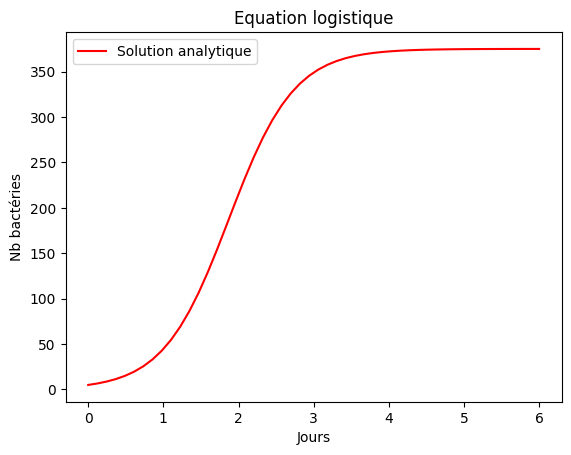

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du modèle
n0 = 5 # Population initiale : 5 bactéries
r = 2.3 # Taux de croissance en conditions idéales
nmax = 375 

def logistique(t,r,n0,nmax):
    """ Calcule la solution analytique exacte pour l'équation logistique """
    c = (nmax-n0)/n0
    return nmax/(1+c*np.exp(-r*t))

# Préparation du graphe
tmax = 6 # Durée de simulation
ta = np.linspace(0,tmax) # Valeurs de temps pour la représentation graphique
na = logistique(ta,r,n0,nmax) # Calcul de la population correspondante

# Affichage des résultats
plt.plot(ta, na, 'r-', label='Solution analytique')
plt.xlabel('Jours')
plt.ylabel('Nb bactéries')
plt.title('Equation logistique')
plt.legend()

plt.show()

In [4]:
print(f"La population au temps t = {ta[15]:4.2f} est de {na[15]:4.0f}.")

La population au temps t = 1.84 et de  180.


# Résolution numérique avec la méthode d'Euler

Le principe de la méthode d'Euler est d'approximer la dérivée dans l'équation différentielle que l'on souhaite résoudre par un calcul d'accroissement entre deux temps proches $t$ et $t+\delta t$. On approxime ainsi la dérivée par :

$$\frac{dn}{dt} \approx \frac{n(t+\delta t)-n(t)}{\delta t}
$$

L'étape suivante consiste à remplacer la dérivée dans l'équation que l'on recherche par l'approximation ci-dessus. Pour le cas des bactéries on obtient :

$$\frac{n(t+\delta t)-n(t)}{\delta t} = r \cdot n (t) \left( 1 - \frac{n(t) }{n_{max}} \right)$$

Dans cette équation, notre objectif est d'estimer la valeur de $n(t+\delta t)$ au pas de temps suivant, en connaissant la valeur au pas de temps précédent. On re-écrit donc l'équation précédente en isolant l'inconnue. On trouve :
 
$$\boxed{ n(t+\delta t) = n(t) +\delta t \cdot r \cdot n(t) \left( 1 - \frac{n(t) }{n_{max}} \right) }$$

Ainsi, en partant de la valeur initiale connue $n_0$, vous allez pouvoir calculer la valeur de $n$ à tous les pas de temps en appliquant itérativement la formule ci-dessus.

**Exercice 2 - question**

Définissez tout d'abord un pas de temps petit. Par exemple, $dt = 0.0001$ jours.

Calculer le nombre $nt$ de pas de temps nécessaires pour discrétiser le temps de $0$ à votre temps maximum (6 jours) avec un pas de $dt$.

Résolvez ensuite l'équation de Verhulst avec la méthode d'Euler. Faite un graphe qui superpose le résultat obtenu avec cette méthode avec la solution analytique calculée dans l'exercice 1.

Comment jugez-vous la qualité de l'approximation numérique ?

**Exercice 2 - solution**

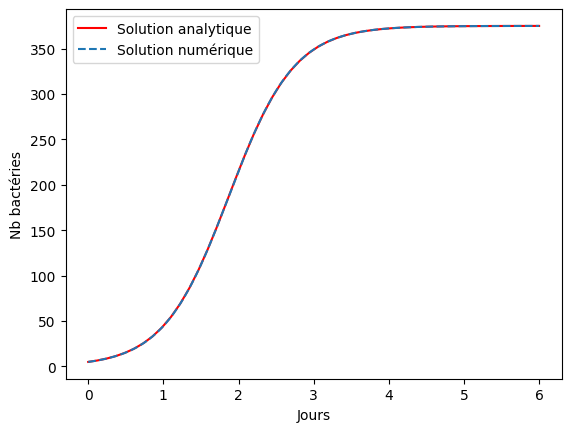

In [6]:
# Pas de temps pour la méthode numérique
dt = 0.0001

# Initialisation des variables
nt = int(tmax/dt) + 1
t = np.linspace(0,tmax,nt)
n = np.zeros(nt)
n[0] = n0

# Résolution à l'aide de la méthode d'Euler
for i in range(1,nt):
    n[i] = n[i-1] + dt * r * n[i-1] * (1 - n[i-1] / nmax)

# Affichage et comparaison des résultats
plt.plot(ta, na ,'r-', label='Solution analytique')
plt.plot(t, n, '--', label='Solution numérique')
plt.xlabel('Jours')
plt.ylabel('Nb bactéries')
plt.legend()
plt.show()

**Remarque** : La qualité de la solution est excellente, les deux courbes se superposent parfaitement.

**Exercice 3 - solution** 

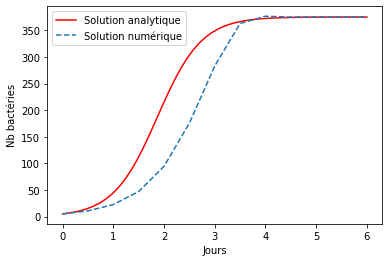

In [4]:
# Pas de temps pour la méthode numérique
dt = 0.5

# Initialisation des variables
nt = int(tmax/dt) + 1
t = np.linspace(0,tmax,nt)
n = np.zeros(nt)
n[0] = n0

# Résolution à l'aide de la méthode d'Euler
for i in range(1,nt):
    n[i] = n[i-1] + dt * r * n[i-1] * (1 - n[i-1] / nmax)

# Affichage et comparaison des résultats
plt.plot(ta, na ,'r-', label='Solution analytique')
plt.plot(t, n, '--', label='Solution numérique')
plt.xlabel('Jours')
plt.ylabel('Nb bactéries')
plt.legend()
plt.show()

**Observation:** Pour un pas de temps trop grand, la méthode d'Euler donne des résultats avec une erreur importante par rapport à la solution analytique. Il faut donc bien s'assurer que le pas de temps est petit par rapport à la vitesse avec laquelle varie la solution de l'équation différentielle.

# Résolution numérique avec la méthode de Runge-Kutta

La méthode d'Euler est simple à implémenter mais nécessite de choisir un petit pas de temps pour être précise. Il est possible d'augmenter la précision de la résolution numérique en faisant une meilleur approximation de la dérivée. La méthode de Runge-Kutta à l'ordre 4 est très souvent employée car elle offre un gain de précision important tout en restant assez simple à programmer. Son principe consiste à approcher la dérivée en la calculant comme la moyenne pondérée de la dérivée estimée en 4 points différents comme expliqué dans le cours.

**Exercice 4 - Question**

Faites une copie de votre code précédent dans la cellule ci-dessous afin de l'adapter pour qu'il résolve aussi la même équation par la méthode de Runge-Kutta. Comparer graphiquement les résultats pour un pas de temps de 0.5 jours. Qu'observervez-vous ? Modifiez le pas de temps en prenant les valeurs 1 jour, 0.7 jour, 0.4 jour, 0.1 jour, 0.01 jour) et refaites les calculs pour tester la sensibilité des deux méthodes. Qu'en concluez-vous ?

**Exercice 4 - Solution** 

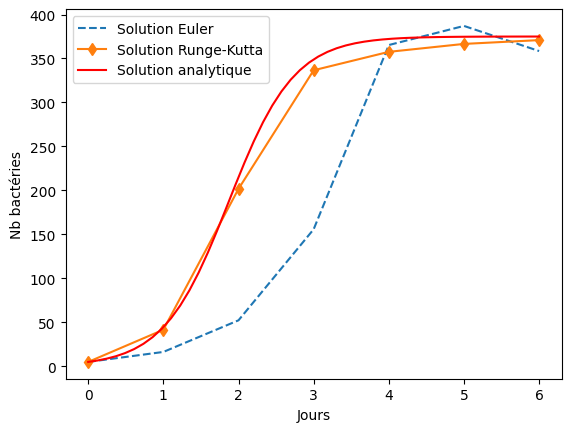

In [7]:
# Pas de temps pour la méthode numérique
dt = 1.

# Initialisation des variables
nt = int(tmax/dt) + 1
t = np.linspace(0,tmax,nt)

def g(n):
    return  r * n * (1 - n / nmax)

# Intégration à l'aide de la méthode d'Euler
ne = np.zeros(nt)
ne[0] = n0
for i in range(1,nt):
    ne[i] = ne[i-1] + dt * g( ne[i-1] )
    

# Intégration à l'aide de la méthode de Runge-Kutta
nrk = np.zeros(nt)
nrk[0] = n0
for i in range(1,nt):
    k1 = g( nrk[i-1] ) 
    k2 = g( nrk[i-1] + 0.5* dt * k1 ) 
    k3 = g( nrk[i-1] + 0.5* dt * k2 ) 
    k4 = g( nrk[i-1] + dt * k3 ) 
    nrk[i] = nrk[i-1] + dt * ( k1  + 2*k2 + 2*k3  + k4  ) / 6
    
# Affichage et comparaison des résultats
plt.plot(t, ne, '--', label='Solution Euler')
plt.plot(t, nrk, '-d', label='Solution Runge-Kutta')
plt.plot(ta, na ,'r-', label='Solution analytique')
plt.xlabel('Jours')
plt.ylabel('Nb bactéries')
plt.legend()
plt.show()   

**Observations** : 
- Avec un pas de temps de 0.5, la solution calculée avec la méthode de Runge-Kutta est très proche de la solution analytique, alors que la méthode d'Euler est beaucoup moins précise. 
- Si l'on réduit le pas de temps, l'écart entre les deux méthodes diminue. Elles tendent toutes les deux vers la solution analytique.
- Pour des pas de temps grands on voit apparaitre des oscillations dans les résultats de la méthode d'Euler. La méthode de Runge-Kutta est plus stable dans ce cas, mais commence elle aussi à montrer des erreurs importantes.